#                                       Edoardo Antonaci 1234431

## Exercise 1

### A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.

### a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the yournal ?

### - Also without data ,we can suppose a binomial distribution as $prior$ $ distribution$ because a person,indipendently for the other ones,can read or not the last issue of the journal

### b) Assuming a uniform prior, what is the posterior distribution for y ?

### - For bayes : posterior $ \propto$ likelihood*prior . So given uniform distribution as prior distribution, we simplified previous relation in posterior $ \propto$ likelihood

### c) Plot both posterior and likelihood ditributions functions


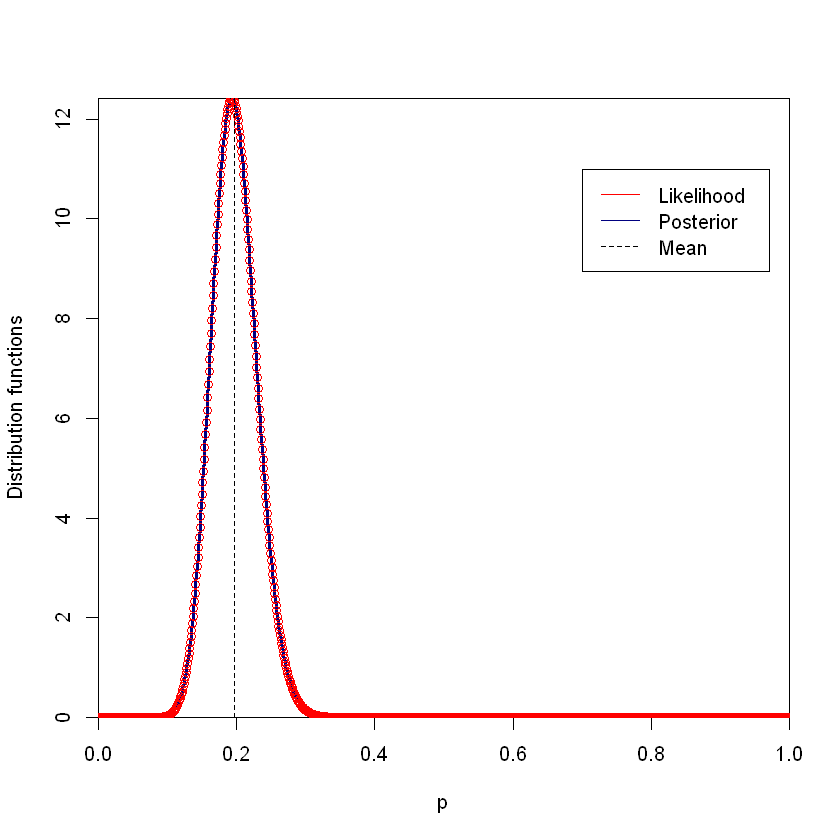

In [1]:
n <- 150
r <- 29

b<-1;a<-0                                               #extreams of prob

p <- seq(a,b, length = 1e3)                              #probability sequences

interval_width<-(b-a)/(length(p)-1)                        #/\p


prior<-1                                             #uniform probability,we have no indications about if events are more
                                                        # possible the others

likelihood <- dbinom(x=r, size=n, prob=p)       

Z <- sum(likelihood*prior)*interval_width           


posterior <-likelihood*prior/(Z)

plot(p, posterior ,xaxs='i', yaxs='i', col='navy',
    type='l', lty=1, lwd = 3, xlab="p",
     ylab=("Distribution functions"))

lines(p, likelihood/sum(likelihood*interval_width),xaxs='i', yaxs='i', #plot normalized likelihood
    type='p', lty=1, lwd = 1, xlab="p", col='red')

post_mean <- sum(posterior*p)*interval_width

abline(v=post_mean , lty=2)
legend(0.7, 11, c("Likelihood","Posterior", "Mean"), col=c("red","navy","black"), lty= c('solid','solid','dashed'))


## Exercise 2

### • Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.
### • Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.
### • Benny moved only recently to this new town and therefore he does non have the slightest idea about it. Therefore he decides to use a uniform prior.
### • Chris believes that his prior should have a trapezoidal shape



$$ f(X) =  \begin{cases}  20x & \mbox{if }\mbox{ 0 ≤ x < 0.1} \\ 2 & \mbox{if}\mbox{ 0.1 ≤ x <0.3}\\ 5 − 10x &\mbox{if }\mbox{0.3 ≤ x < 0.5}\\ 0 & \mbox{if }\mbox {x ≥ 0.5 }\end{cases} $$

### a) Draw and compare the three prior distributions

In [18]:
##mean= alpha/(alpha+beta)
##var = alpha*beta/[( (alpha+beta)**2)*(a+b+1) ]    https://local.disia.unifi.it/VL/VL_IT/special/special9.html

anna<-function(x,mean,std,par){
    var<-std**2
    
    
    alpha<-mean*(-mean**2+mean-var)/var
    
    beta<-alpha*(1/mean-1)
    
    
    if(par==0){return(dbeta(x, alpha , beta) )}else{return(c(alpha,beta) )}
    
    }

benny<-function(x){return(dunif(x) ) }

chris<-function(x){
    ff<-c()
    for (i in 1:length(x)){
        if(x[i]<0.1 & x[i]>=0){ff<-c(ff,20*x[i])}
        else if(x[i]>=0.1 & x[i]<0.3){ff<-c(ff,2)}
        else if(x[i]<0.5 & x[i]>=0.3){ff<-c(ff,5-10*x[i])}
        else{ff<-c(ff,0)}}
    return(ff)
}

p.anna<-anna(p,mean=0.2,std=0.08,par=0)

p.benny<-benny(p)
    
p.chris<-chris(p)


7.3 29.2

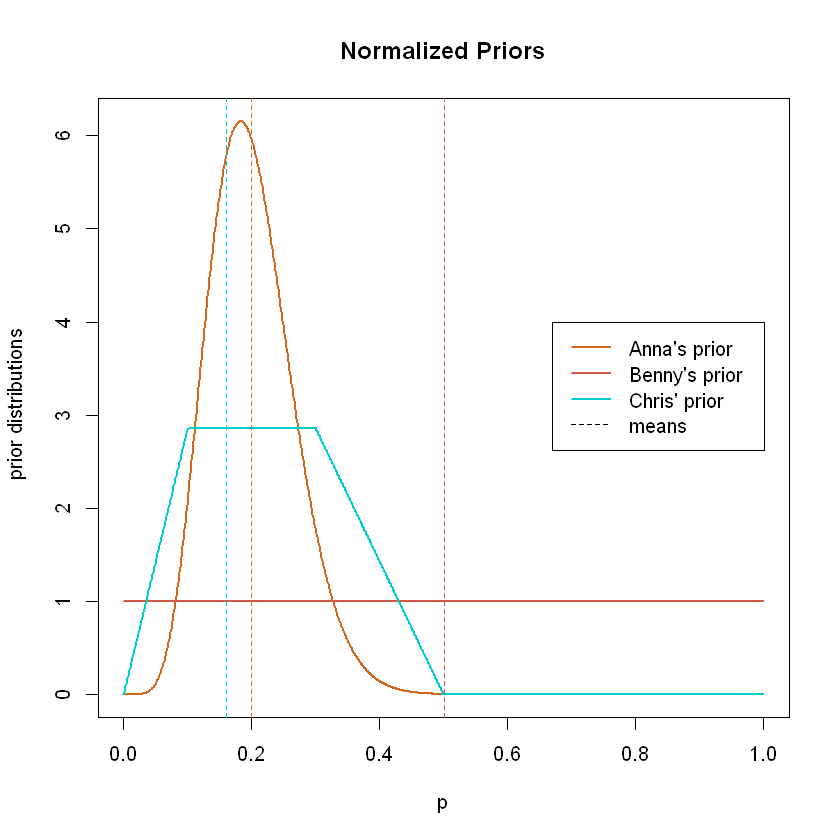

In [19]:

plot(p, p.anna/(sum(p.anna)*interval_width) , type='l', lwd = 2, col='chocolate', ylab=' prior distributions')
lines(p, p.benny/(sum(p.benny)*interval_width), type='l', lwd = 2, col='coral3')
lines(p, p.chris/(sum(p.chris)*interval_width), type='l', lwd = 2, col='cyan3')

mean.anna <- sum(p*p.anna )*interval_width
mean.benny <- sum(p*p.benny)*interval_width
mean.chris <- sum(p*p.chris)*interval_width

abline(v=mean.anna , lty=2, col='chocolate')
abline(v=mean.benny , lty=2, col='coral3')
abline(v=mean.chris , lty=2, col='cyan3')

legend(0.67,4, c("Anna's prior", "Benny's prior",  "Chris' prior","means"), 
       col=c("chocolate","coral3","cyan3","black"), 
       lty= c('solid','solid','solid',"dashed"),
       lwd = c(2,2,2,1))

title(main="Normalized Priors")



### • The next day the three students decide to interview a sample of 100 citizens of the small town,asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert hall.


### b) Evaluate and draw the three posterior distributions.

In [4]:
posterior<-function(likelihood,prior,interval_width){
    
    Z<-sum(likelihood*prior)*interval_width 
    post<-likelihood*prior/(Z)
    
    return(post)
}

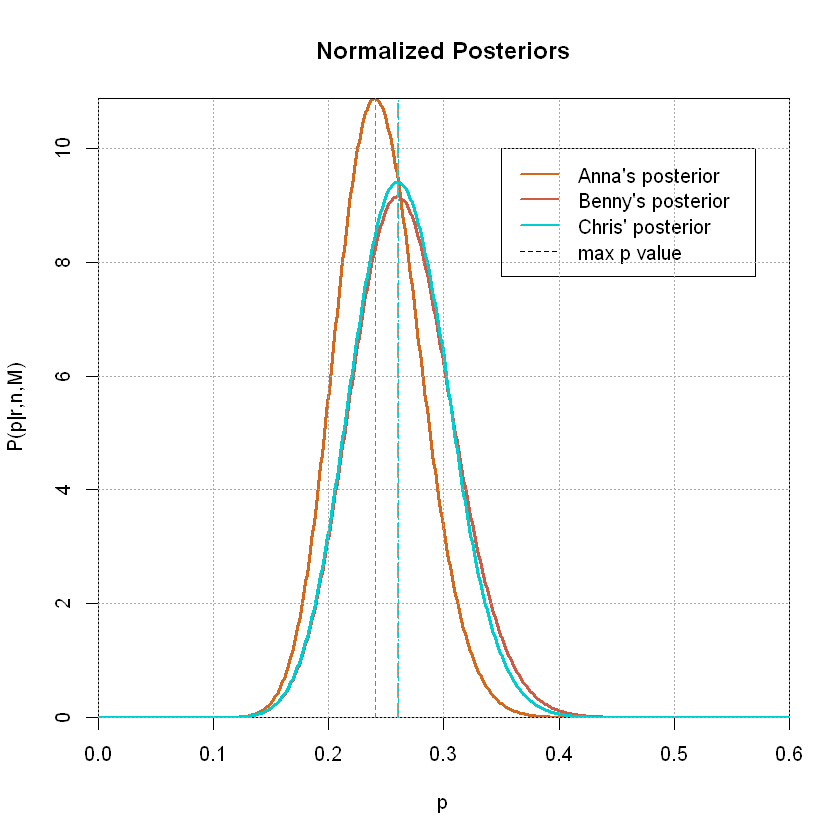

In [5]:
likelihood <- dbinom(x=26, size=100, prob=p)        


posterior.anna <-posterior(likelihood = likelihood,prior = p.anna,interval_width = interval_width)
posterior.benny <-posterior(likelihood = likelihood,prior = p.benny,interval_width = interval_width)
posterior.chris<-posterior(likelihood = likelihood,prior = p.chris,interval_width = interval_width)

posteriors<-data.frame("post anna"=posterior.anna,
                       "post benny"=posterior.benny,
                       "post chris"=posterior.chris)

plot(p, posteriors[,1] ,xaxs='i', yaxs='i', col='chocolate',
    type='l', lty=1, lwd = 3, xlab="p",
     ylab=("P(p|r,n,M)"),xlim=c(0,0.6))
lines(p, posteriors[,2] ,xaxs='i', yaxs='i', col='coral3',
    type='l', lty=1, lwd = 3, xlab="p")
lines(p, posteriors[,3] ,xaxs='i', yaxs='i', col='cyan3',
    type='l', lty=1, lwd = 3, xlab="p")

    
legend(0.35, 10, c("Anna's posterior", "Benny's posterior",  "Chris' posterior","max p value"), 
       col=c("chocolate","coral3","cyan3","black"), 
       lty= c('solid','solid','solid',"dashed"),
       lwd = c(2,2,2,1) )
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")

e.anna <- which.max(posterior.anna)
e.benny <- which.max(posterior.benny)
e.chris <- which.max(posterior.chris)


abline(v=p[e.anna] , lty=2, col='chocolate')
abline(v=p[e.benny] ,lwd=2, lty=5, col='coral')
abline(v=p[e.chris] , lty=4, col='cyan3')

title(main="Normalized Posteriors")


### c) Give an estimate of the most probable value and the 95% credibility interval.

In [6]:
CI<-function(p,post,perc,interval_width){
    
    if(length(p)!=length(post)){return(-1 > 0)}
    
    M<-which.max(post)
    most_prob_value<-p[M]
    
    cl<-0.0
    i<-0
    
    while(cl<perc){
        
        i<-i+1
        
        if( (M+i)<=length(post) & (M-i)>= 1 ){
            
         cl<-sum(post[(M-i):(M+i)]*interval_width) 
        
                                            }
        else if( (M+i)> length(post) & (M-i) >= 1 ){
            
        
            cl<-sum(post[(M-i):length(post)]*interval_width)
            
            
                                                    }
            
        else if( (M+i)<=length(post) & (M-i)< 1 ){
            

            cl<-sum(post[1:(M+i)]*interval_width)
            
                                                    }
                  }#while cycle ends
    
        if((M+i)<=length(post) & (M-i)>= 1){ lower_bound<-p[M-i];upper_bound<-p[M+i]  }
        else if((M+i) >length(post) & (M-i)>= 1){ lower_bound<-p[M-i];upper_bound<-p[length(post)]  }
        else if((M+i) <=length(post) & (M-i) < 1){ lower_bound<-p[1];upper_bound<-p[M+i]  }
        

    
    return( c(lower_bound,upper_bound) )
    
}

In [7]:
c.anna <- CI(p=p,post=posterior.anna,perc=0.95,interval_width=interval_width)
c.benny <- CI(p=p,post=posterior.benny,perc=0.95,interval_width=interval_width)
c.chris <- CI(p=p,post=posterior.chris,perc=0.95,interval_width=interval_width)



I.anna<-sum(posterior.anna[which(p==c.anna[1]):which(p==c.anna[2]) ] ) *interval_width
I.benny<-sum(posterior.benny[which(p==c.benny[1]):which(p==c.benny[2]) ] ) *interval_width
I.chris<-sum(posterior.chris[which(p==c.chris[1]):which(p==c.chris[2]) ] ) *interval_width

CL<-data.frame("most probable value"=c(p[e.anna],p[e.benny],p[e.chris]),
               "lower bound"=c(c.anna[1],c.benny[1],c.chris[1]),
               "upper bound"=c(c.anna[2],c.benny[2],c.chris[2]),
               "Integral"=c(I.anna,I.benny,I.chris),
               row.names=c("Anna","Benny","Chris")
                )
CL

,most.probable.value,lower.bound,upper.bound,Integral
Anna,0.2402402,0.1681682,0.3123123,0.9515428
Benny,0.2602603,0.1751752,0.3453453,0.9502321
Chris,0.2602603,0.1791792,0.3413413,0.9509705


## Exercise 3 

### A coin is flipped n = 30 times with the following outcomes:
### T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,H, H


### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

In [8]:
coin<-c(1,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0)
table(coin)

coin
 0  1 
15 15 

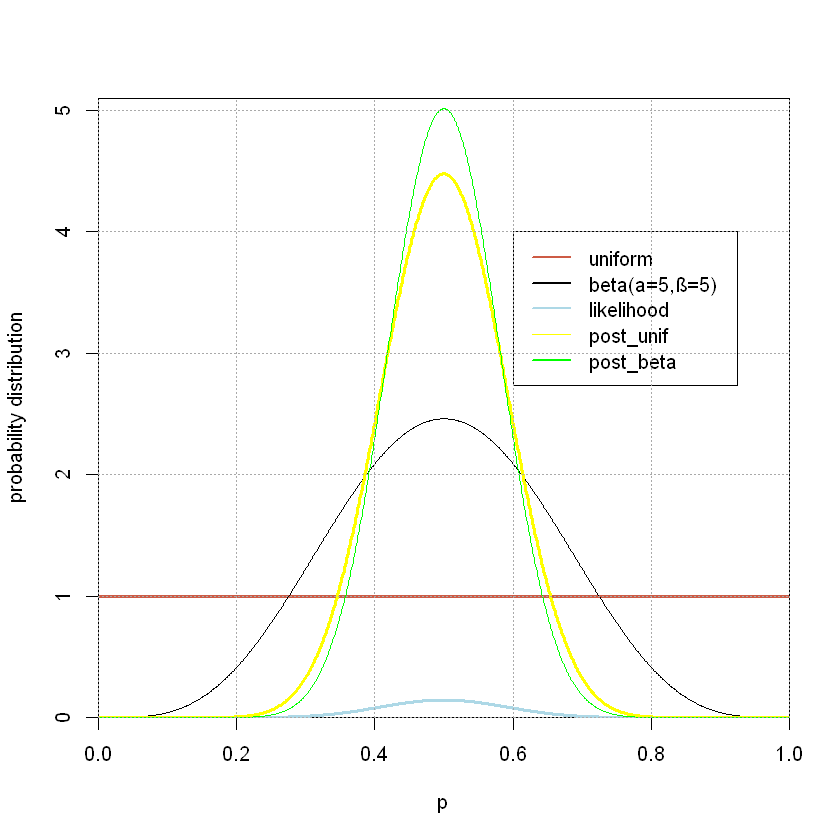

In [9]:
prior_unif<-rep(1,length(p) )

prior_beta<-dbeta(x=p,shape1=5, shape2=5)             

likelihood <- dbinom(x=15, size=30, prob=p)            #likelihood

post_unif<-posterior(likelihood=likelihood,prior=prior_unif,interval_width=interval_width) #normalized

post_beta<-posterior(likelihood=likelihood,prior=prior_beta,interval_width=interval_width) #normalized

plot(p,prior_unif ,xaxs='i', yaxs='i', col='coral3',type='l', lty=1, lwd = 3,   # no normalized
     xlab="p",ylab=("probability distribution"),xlim=c(0,1),ylim=c(0,5.1) )

lines(p,prior_beta ,col="black",type="l", lty=1, lwd =1)                      # no normalized

lines(p,likelihood ,xaxs='i', yaxs='i', col='lightblue',                      # no normalized
    type='l', lty=1, lwd = 3, xlab="p")

lines(p, post_unif,xaxs='i', yaxs='i', col='yellow',                         
    type='l', lty=1, lwd = 3, xlab="p")

lines(p,post_beta,col="green")        

legend(0.6, 4, c("uniform","beta(α=5,β=5)","likelihood","post_unif","post_beta"), 
       col=c("coral3","black","lightblue","yellow","green"), 
       lty= c('solid','solid','solid',"solid","solid" ),
       lwd = c(2,2,2,1) )
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")



### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval

In [10]:
max_post_unif<-p[which.max(post_unif)]
ci_max_post_unif<-CI(p,post=post_unif,perc=0.95,interval_width=interval_width)

max_post_beta<-p[which.max(post_beta)]
ci_max_post_beta<-CI(p,post=post_beta,perc=0.95,interval_width=interval_width)

cat("The most probable value for coin probability using post_unif :",max_post_unif,"\n")
cat("The credibility interval is",ci_max_post_unif[1]," ",ci_max_post_unif[2],"\n")

cat("The most probable value for coin probability using post_beta :",max_post_beta,"\n")
cat("The credibility interval is",ci_max_post_beta[1]," ",ci_max_post_beta[2],"\n")

The most probable value for coin probability using post_unif : 0.4994995 
The credibility interval is 0.3303303   0.6686687 
The most probable value for coin probability using post_beta : 0.4994995 
The credibility interval is 0.3473473   0.6516517 


### c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

In [11]:
seq_analysis<-function(data,p,prior,interval_width){
    
     T<-0
     max_values<-c()
     lower_bound<-c()
     upper_bound<-c()
    
    for (i in 1:length(data) ){
        

        if (data[i]==1){T<-T+1}
        
        likelihood <- dbinom(x=T, size=i, prob=p) 
        post<-posterior(likelihood=likelihood,prior=prior,interval_width=interval_width)
        
        
        max<-p[which.max(post)]

        max_values <-c(max_values,max)

        ci<-CI(p=p,post=post,perc=0.95,interval_width=interval_width)

        lower_bound<-c(lower_bound,ci[1])
        upper_bound<-c(upper_bound,ci[2])
          
                                }
    

    
    data.frame("max value"= max_values,
               "lower bound"= lower_bound,
               "upper bound "= upper_bound
              )
 
    
                                                    }

In [12]:
seq_analysis(data=coin,p=p,prior=prior_unif,interval_width=interval_width)

max.value,lower.bound,upper.bound.
1.0000000,0.2232232,1.0000000
1.0000000,0.3683684,1.0000000
1.0000000,0.4734735,1.0000000
1.0000000,0.5495495,1.0000000
1.0000000,0.6076076,1.0000000
0.8328328,0.4794795,1.0000000
0.8568569,0.5295295,1.0000000
0.8748749,0.5705706,1.0000000
0.7777778,0.4934935,1.0000000
0.6996997,0.4354354,0.9639640


In [13]:
seq_analysis(data=coin,p=p,prior=prior_beta,interval_width=interval_width)

max.value,lower.bound,upper.bound.
0.5555556,0.2792793,0.8318318
0.5995996,0.3353353,0.8638639
0.6366366,0.3823824,0.8908909
0.6666667,0.4224224,0.9109109
0.6926927,0.4574575,0.9279279
0.6426426,0.4124124,0.8728729
0.6666667,0.4444444,0.8888889
0.6876877,0.4734735,0.9019019
0.6466466,0.4354354,0.8578579
0.6106106,0.4024024,0.8188188


### d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?


In [14]:
seq_analysis(data=coin,p=p,prior=prior_unif,interval_width=interval_width)[length(coin),]==c(max_post_unif,
                                                                                             ci_max_post_unif[1],
                                                                                             ci_max_post_unif[2])


,max.value,lower.bound,upper.bound.
30,TRUE,TRUE,TRUE


In [15]:
seq_analysis(data=coin,p=p,prior=prior_beta,interval_width=interval_width)[length(coin),]==c(max_post_beta,
                                                                                             ci_max_post_beta[1],
                                                                                             ci_max_post_beta[2])

,max.value,lower.bound,upper.bound.
30,TRUE,TRUE,TRUE
